# Importer les librairies

In [28]:
import pandas as pd # Manipulation et analyse de données
# Visualisation
import seaborn as sns  # Bibliothèque de visualisation de données construite au-dessus de matplotlib
import matplotlib.pyplot as plt # Collection de fonctions qui permettent la réalisation de visualisation graphique
from scipy import stats #Bibliothèque utilisée pour des calculs statistiques (ex : t-test et p-valeur)


# IMPORTER LES LIBRAIRIES NECESSAIRES A L'ETUDE

# Importer les données

In [29]:
# Loader les data
data = pd.read_csv("titanic.csv")
# Afficher la variable data correspondant aux données de base
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex` et `Embarked` avec l'argument `drop_first=True`.

In [30]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    
    """La fonction prépare les données à l'analyse.
    
    Args:
        data (pd.DataFrame): La dataframe originale
        
    Returns:
        pd.DataFrame: La dataframe preprocessé et prête à être analysée.
    """
    
    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()
    
    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
    # inplace=True indique que la modification doit être effectuée directement sur le DataFrame
    
    # Supprimez lignes contenant au moins une valeur manquante
    data_preprocessed.dropna(axis=0, inplace=True)
    # axis=0 pour supprimer les lignes et non les colonnes 
    
    # Créer une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    data_preprocessed['FamilySize']=data_preprocessed['SibSp']+data_preprocessed['Parch']+1
    data_preprocessed.drop(columns=["SibSp", "Parch"], inplace=True)
    
    # Recalculer le prix du billet
    data_preprocessed['Fare']=data_preprocessed['Fare']/data_preprocessed['FamilySize']
    
    # Encoded (OHE) `Sex` et `Embarked`
    data_preprocessed = pd.get_dummies( # pd.get_dummies permet le One-Hot Encoding
        data=data_preprocessed, # Les données sur lesquelles travailler
        columns=["Sex","Embarked"], # Les colonnes à encoder
        drop_first=True # Supprime la première colonne dummy
    )
        
    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    
    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [31]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,0,1,0
886,0,2,27.0,13.000000,1,1,0,1
887,1,1,19.0,30.000000,1,0,0,1
889,1,1,26.0,30.000000,1,1,0,0


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il est le même que l'âge moyen de la population en 1912 (28 ans)?**
Non, la moyenne n'est pas la même. 29.642 contre 28 ans.

In [32]:
#1. Variable : âge, type quantitative
# Âge moyen des passagers
age_mean = data_clean["Age"].mean() 

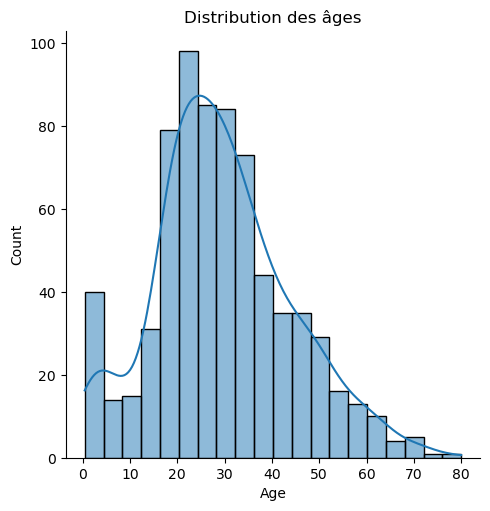

In [33]:
#Visualisation
#Histogramme de l'âge de tous les passagers du Titanic
sns.displot(
    data=data_clean, # notre dataframe
    x="Age", # colonne qui nous intéresse
    kde=True # ajouter une courbe d'estimation
)
plt.title("Distribution des âges")
plt.show()

$H_0: \mu_{\text{moyenne age titanic}} = \mu_{\text{moyenne age population_1912}}$, $H_1: \mu_{\text{moyenne age titanic}} \ne \mu_{\text{moyenne age population 1912}}$

C'est un T-TEST car une variable et nous ne connaissons pas l'écart de la population car il n'est pas donné

Les assumptions pour un T-TEST sont :

    - L'échantillon est aléatoire
    - La taille de l'échantillon est supérieur à 30, ou la population est normalement distribuée
Pour vérifier la taille de l'échantillon, il suffit consulter le nombre de lignes dans le "data_clean" --> 712 rows

In [40]:
alpha = 0.05 #Seuil de 5% comme utilisé en classe
ages = data_clean['Age'] #Tableau de tous les âges à partir de notre data frame clean

#stats.ttest_1samp permet de calculer le t-test en une seule ligne
t, p_valeur = stats.ttest_1samp(ages, popmean=28) #param de notre fonction, âge moyen calculé au-dessus et l'âge moyen 1912

print("La statistique t est de : " + str(t))
print("La p-valeur associée est de : " + str(p_valeur))

# Si p-valeur < alpha, on rejète l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejète l'hypothèse nulle car p-valeur < alpha.")
    
# Si p-valeur > alpha, on ne rejète pas l'hypothèse nulle
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejète pas l'hypothèse nulle car p-valeur > alpha.")

La statistique t est de : 3.0233009800374053
La p-valeur associée est de : 0.002590259537786662
Avec un seuil alpha 0.05 on rejète l'hypothèse nulle car p-valeur < alpha.


**Q2: La survie dépend-elle de la classe du passager?**

**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**

**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

Pour chacune des questions 1 à 4 ci-dessus, argumenter de manière statistique en effectuant chacune des étapes suivantes:
1. Identifier la ou les variables d'intérêt et spécifier le type.
2. Réaliser une visualisation appropriée selon la ou les variables.
3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
4. Identifier le test statistique approprié selon les hypothèses énoncées.
5. Vérifier la validation des assumptions selon le test identifié.
6. Calculer la statistique ainsi que la p-valeur.
7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
8. Interpréter le résultat et évaluer la taille de l'effet.

Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**